
年龄描述性统计:
count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


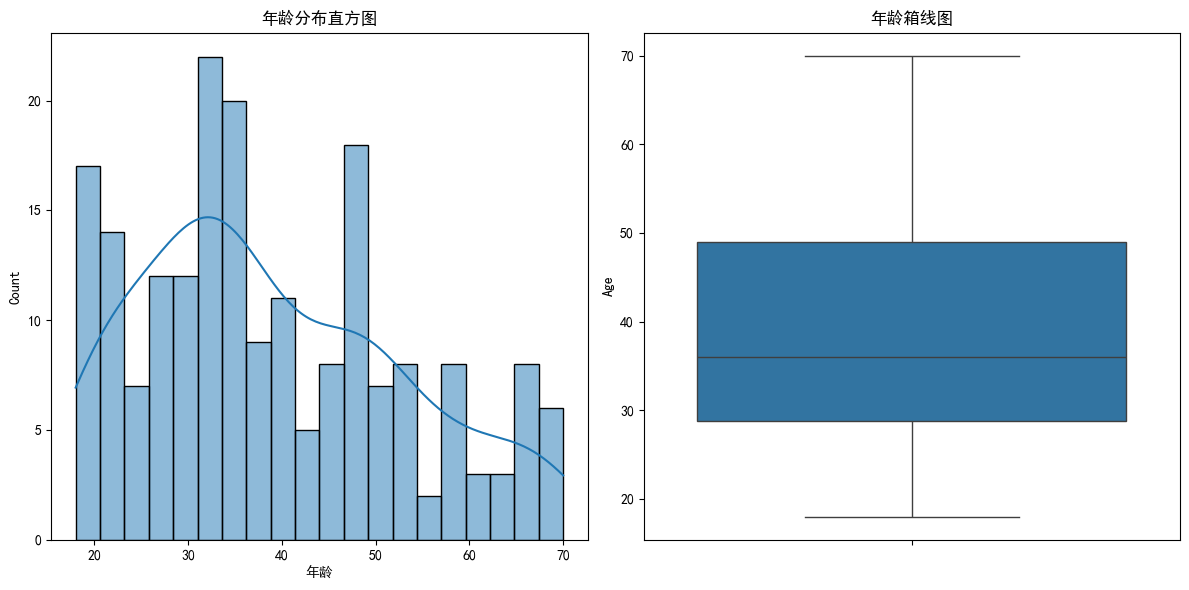


年收入描述性统计:
count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Income, dtype: float64


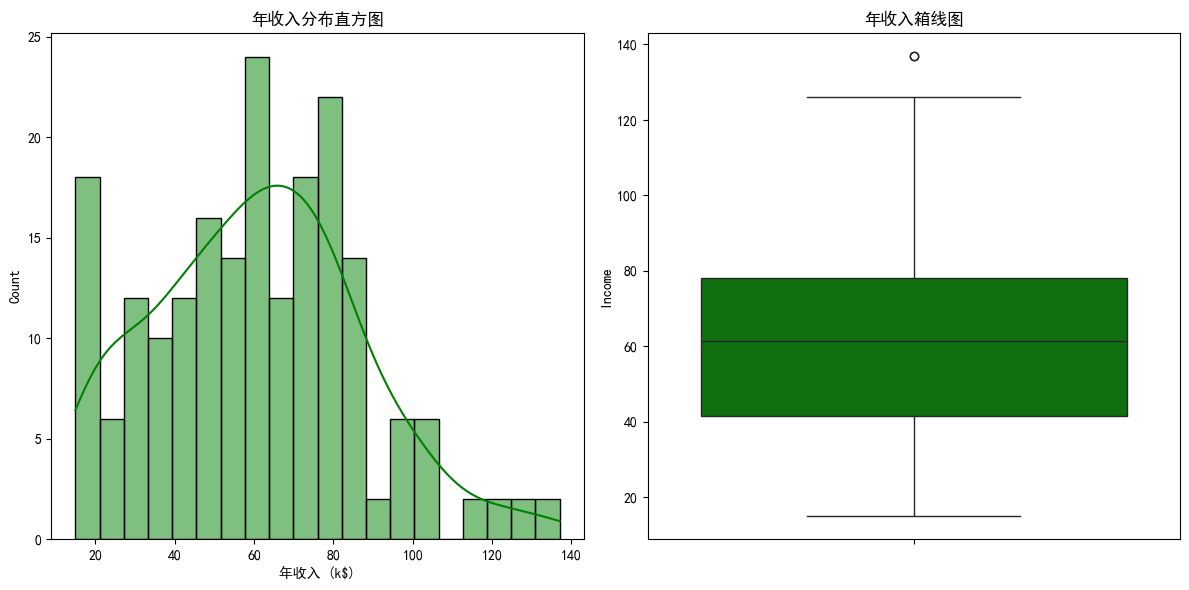


消费评分描述性统计:
count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: SpendingScore, dtype: float64


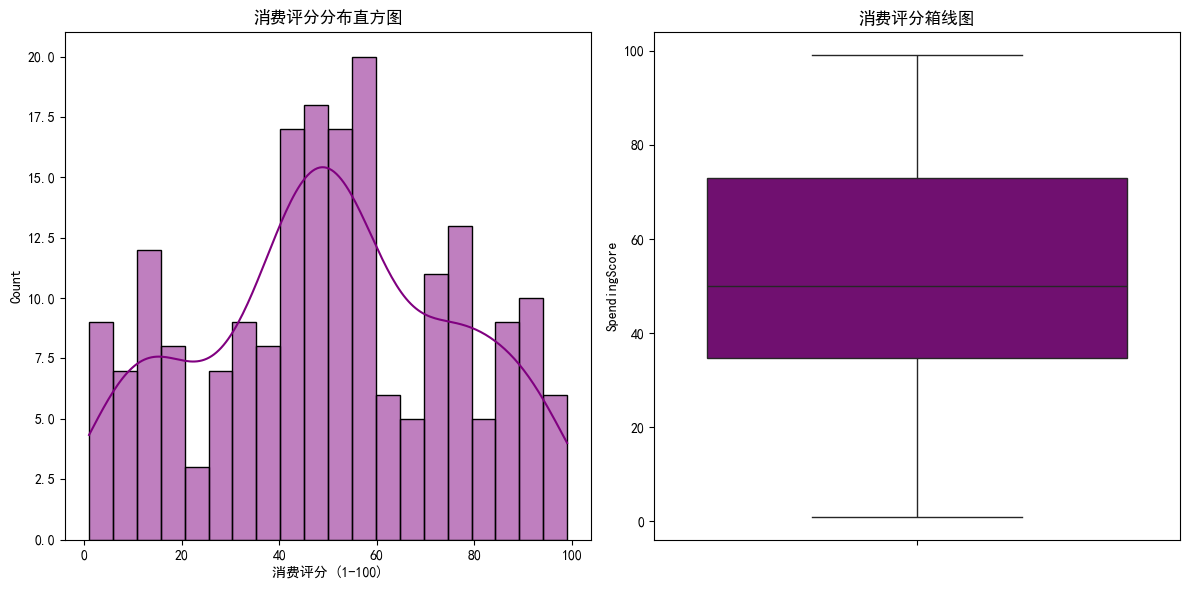

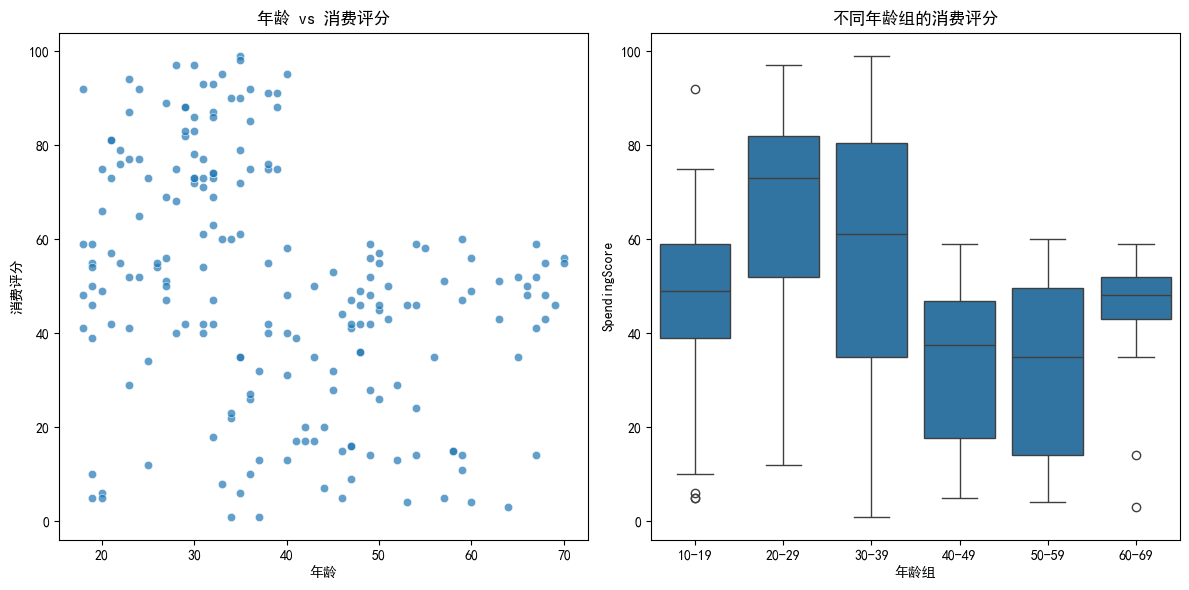

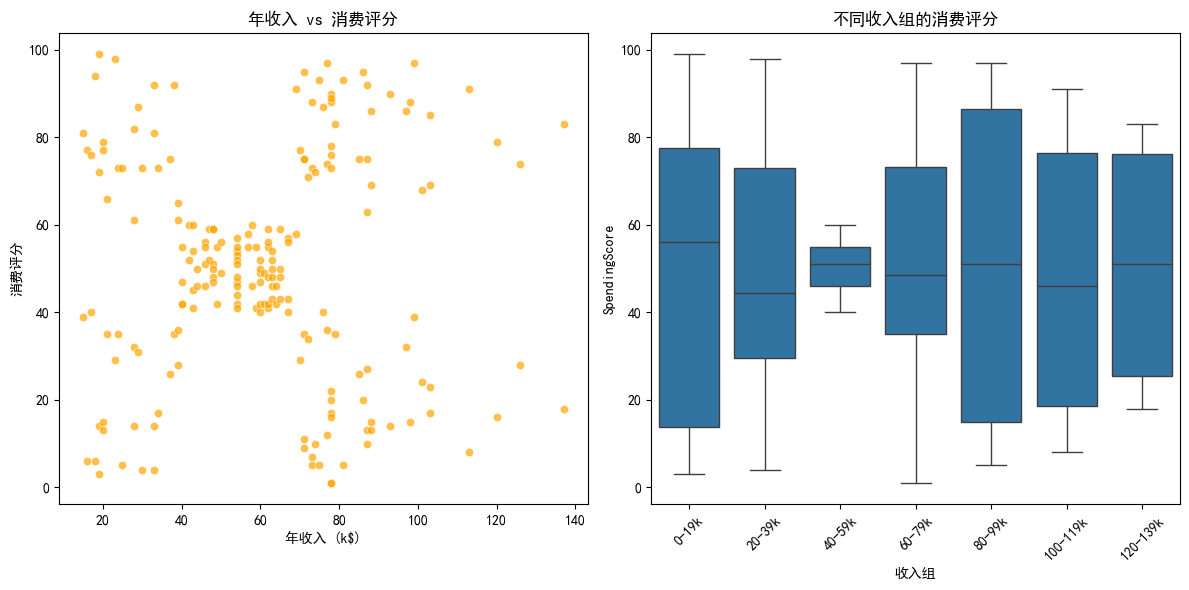

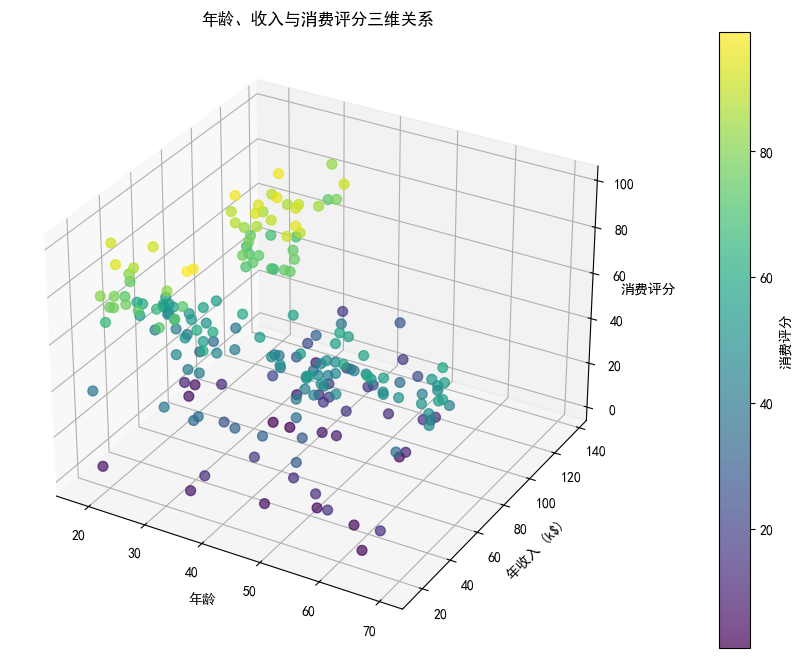

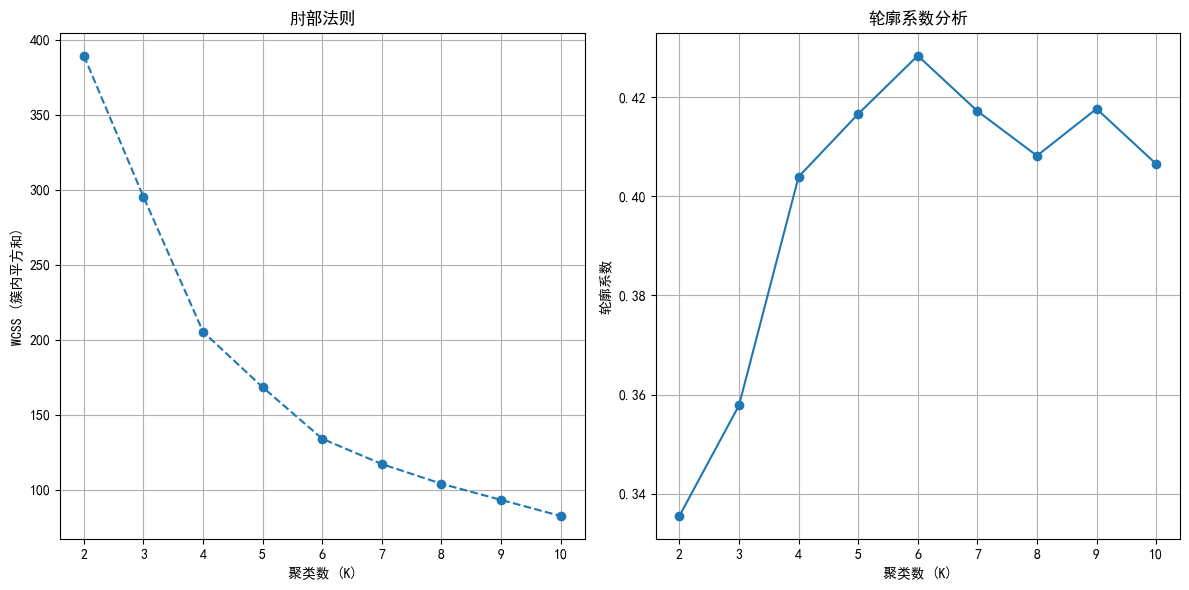

最佳聚类数（基于轮廓系数）: K = 6

各聚类客户数量:
Cluster
0    45
1    39
2    33
3    39
4    23
5    21
Name: count, dtype: int64


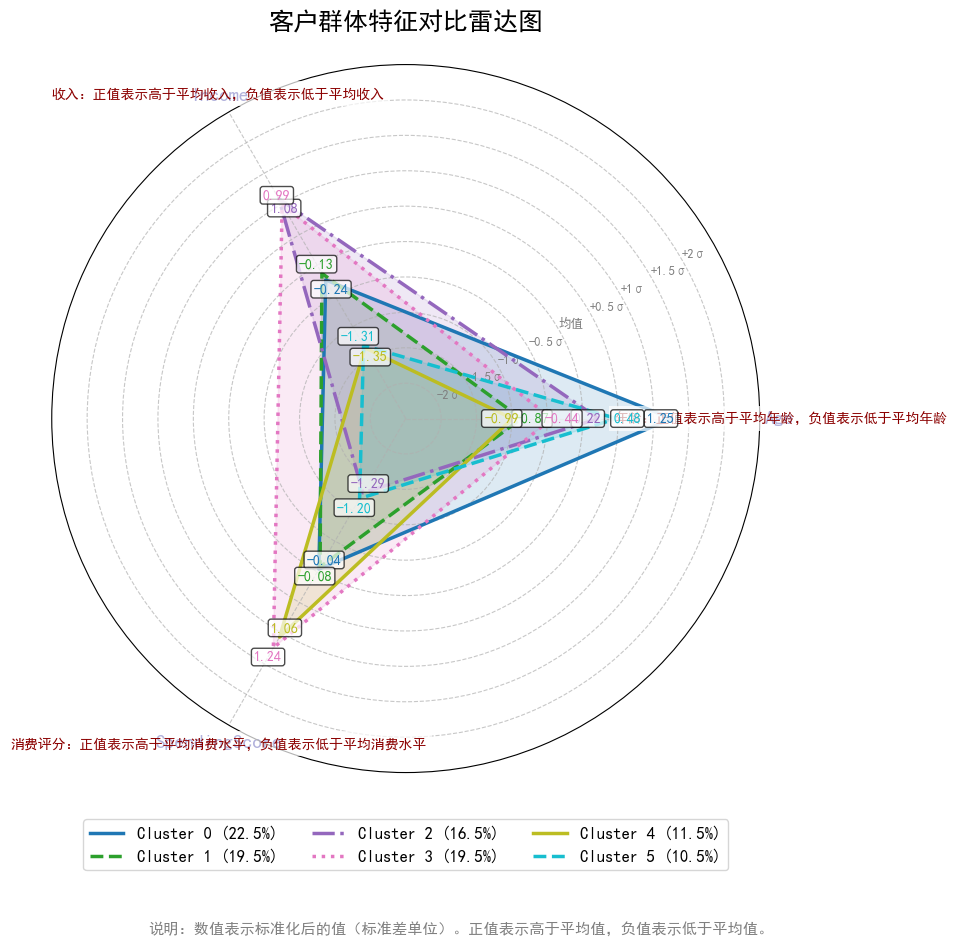

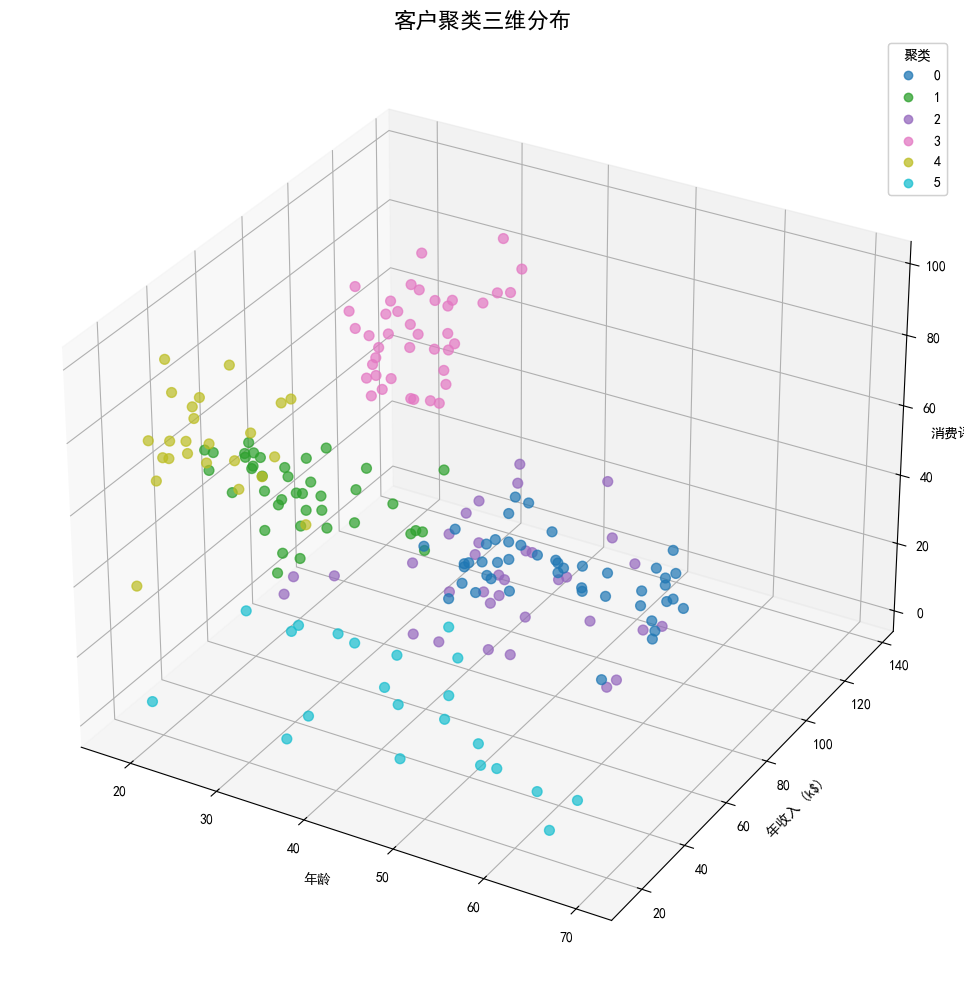

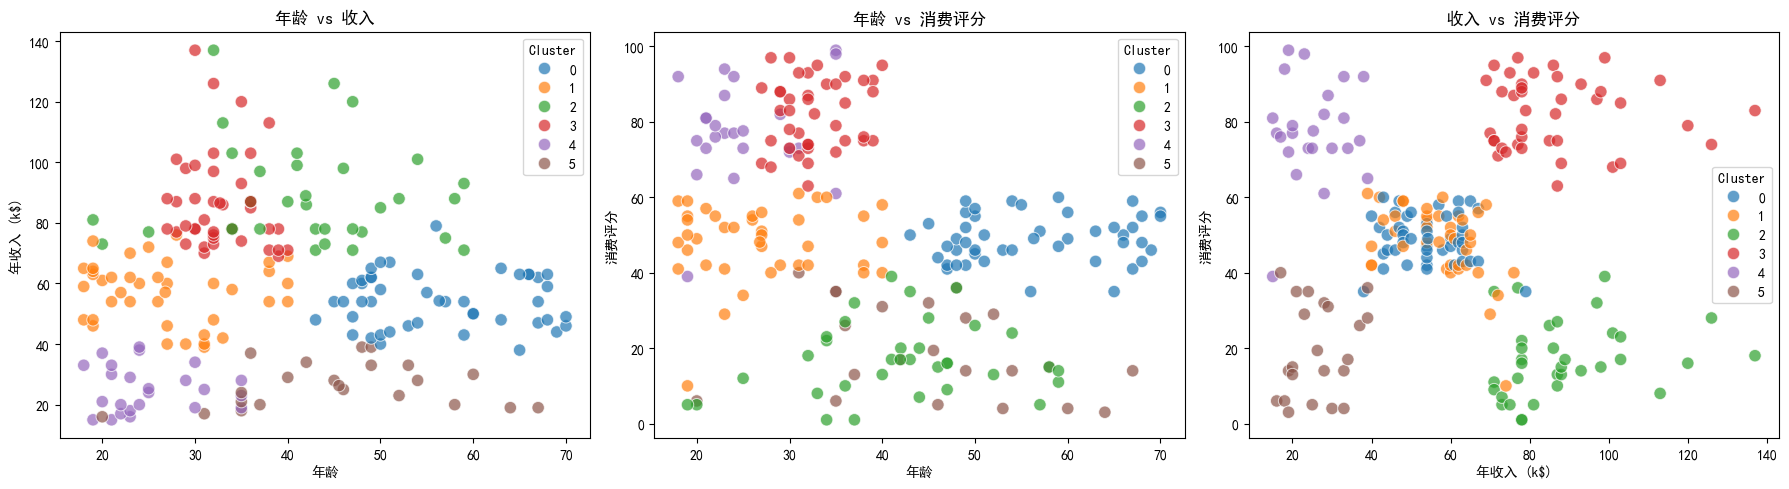


聚类特征统计:
          Age              Income              SpendingScore             
         mean median   std   mean median   std          mean median   std
Cluster                                                                  
0        56.3   54.5   8.4   54.3   54.0   8.9          49.1   49.0   6.2
1        26.8   26.4   7.0   57.1   59.5  10.0          48.1   49.5   9.8
2        41.9   42.5  10.0   88.9   86.5  16.3          17.0   16.0   9.8
3        32.7   32.0   3.7   86.5   80.0  16.1          82.1   83.0   9.2
4        25.0   23.5   5.2   25.3   24.5   7.6          77.6   77.0  13.0
5        45.5   45.8  11.5   26.3   25.6   7.3          19.4   16.0  12.3

各聚类客户比例:
Cluster
0    22.3
1    19.4
2    16.5
3    19.4
4    11.7
5    10.7
Name: proportion, dtype: float64

聚类特征描述与营销建议:
聚类 0:
- 平均年龄: 56.3岁
- 平均年收入: $54.3k
- 平均消费评分: 49.1/100
- 客户特征: 年长客户, 中等收入, 中等消费群体
- 营销建议: 提供中等折扣和忠诚度计划

--------------------------------------------------
聚类 1:
- 平均年龄: 26.8岁
- 平均年收入: $57.1k
- 平均消费评分:

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1498.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
mpl.rcParams['font.family'] = 'sans-serif'
df=pd.read_csv('Mall_Customers.csv')
df = df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'})
# 描述性统计
print("\n年龄描述性统计:")
print(df['Age'].describe())

# 可视化
plt.figure(figsize=(12, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('年龄分布直方图')
plt.xlabel('年龄')

# 箱线图
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'])
plt.title('年龄箱线图')

plt.tight_layout()
plt.savefig("年龄分布直方图-年龄箱线图.png", dpi=300, bbox_inches="tight")
plt.show()

# 描述性统计
print("\n年收入描述性统计:")
print(df['Income'].describe())

# 可视化
plt.figure(figsize=(12, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True, bins=20, color='green')
plt.title('年收入分布直方图')
plt.xlabel('年收入 (k$)')

# 箱线图
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Income'], color='green')
plt.title('年收入箱线图')

plt.tight_layout()
plt.savefig("年收入分布直方图-年收入箱线图.png", dpi=300, bbox_inches="tight")
plt.show()
# 描述性统计
print("\n消费评分描述性统计:")
print(df['SpendingScore'].describe())

# 可视化
plt.figure(figsize=(12, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(df['SpendingScore'], kde=True, bins=20, color='purple')
plt.title('消费评分分布直方图')
plt.xlabel('消费评分 (1-100)')

# 箱线图
plt.subplot(1, 2, 2)
sns.boxplot(y=df['SpendingScore'], color='purple')
plt.title('消费评分箱线图')

plt.tight_layout()
plt.savefig("消费评分分布直方图-消费评分箱线图.png", dpi=300, bbox_inches="tight")
plt.show()
plt.figure(figsize=(12, 6))

# 散点图
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='SpendingScore', data=df, alpha=0.7)
plt.title('年龄 vs 消费评分')
plt.xlabel('年龄')
plt.ylabel('消费评分')

# 分组箱线图
plt.subplot(1, 2, 2)
# 创建年龄分组（每10年一组）
df['AgeGroup'] = pd.cut(df['Age'], bins=range(10, 80, 10), 
                       labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69'])
sns.boxplot(x='AgeGroup', y='SpendingScore', data=df)
plt.title('不同年龄组的消费评分')
plt.xlabel('年龄组')
plt.tight_layout()
plt.savefig("年龄 vs 消费评分-不同年龄组的消费评分.png", dpi=300, bbox_inches="tight")
plt.show()
plt.figure(figsize=(12, 6))

# 散点图
plt.subplot(1, 2, 1)
sns.scatterplot(x='Income', y='SpendingScore', data=df, alpha=0.7, color='orange')
plt.title('年收入 vs 消费评分')
plt.xlabel('年收入 (k$)')
plt.ylabel('消费评分')

# 分组箱线图
plt.subplot(1, 2, 2)
# 创建收入分组（每20k一组）
df['IncomeGroup'] = pd.cut(df['Income'], bins=range(0, 150, 20), 
                          labels=['0-19k', '20-39k', '40-59k', '60-79k', '80-99k', '100-119k', '120-139k'])
sns.boxplot(x='IncomeGroup', y='SpendingScore', data=df)
plt.title('不同收入组的消费评分')
plt.xlabel('收入组')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("年收入 vs 消费评分-不同收入组的消费评分.png", dpi=300, bbox_inches="tight")
plt.show()
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维散点图
scatter = ax.scatter(df['Age'], df['Income'], df['SpendingScore'], 
                    c=df['SpendingScore'], cmap='viridis', s=50, alpha=0.7)

ax.set_xlabel('年龄')
ax.set_ylabel('年收入 (k$)')
ax.set_zlabel('消费评分')
ax.set_title('年龄、收入与消费评分三维关系')

# 添加颜色条
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('消费评分')
plt.savefig("年龄、收入与消费评分三维关系.png", dpi=300, bbox_inches="tight")
plt.show()

# 选择特征并标准化
X = df[['Age', 'Income', 'SpendingScore']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []  # 保存每个K值的WCSS(簇内平方和)
silhouette_scores = []  # 保存轮廓系数
k_range = range(2, 11)  # 尝试K从2到10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # 计算轮廓系数（仅当K>1且K<样本数时）
    if 1 < k < len(X_scaled):
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# 绘制肘部法则图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('聚类数 (K)')
plt.ylabel('WCSS (簇内平方和)')
plt.title('肘部法则')
plt.grid(True)

# 绘制轮廓系数图
plt.subplot(1, 2, 2)
plt.plot(range(2, len(silhouette_scores)+2), silhouette_scores, marker='o')
plt.xlabel('聚类数 (K)')
plt.ylabel('轮廓系数')
plt.title('轮廓系数分析')
plt.grid(True)

plt.tight_layout()
plt.savefig("肘部法则-轮廓系数分析.png", dpi=300, bbox_inches="tight")
plt.show()

# 自动选择最佳K值（基于轮廓系数最大化）
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"最佳聚类数（基于轮廓系数）: K = {best_k}")
# 使用最佳K值进行聚类
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_scaled)

# 将聚类结果添加到原始数据
df['Cluster'] = kmeans.labels_
df['is_center'] = False 

# 查看聚类分布
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\n各聚类客户数量:")
print(cluster_counts)

# 查看聚类中心（原始尺度）
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, 
                                 columns=['Age', 'Income', 'SpendingScore'])
cluster_centers_df['Cluster'] = range(best_k)
cluster_centers_df['is_center'] = True  # 标记为中心点

# 将中心点添加到数据框（用于可视化）
df = pd.concat([df, cluster_centers_df], ignore_index=True)
    # 准备雷达图数据
categories = ['Age', 'Income', 'SpendingScore']
N = len(categories)

# 只选择数值特征列
numeric_centers = cluster_centers_df[categories]

# 计算每个聚类的平均特征值（标准化后）
cluster_avg = pd.DataFrame(scaler.transform(numeric_centers), columns=categories)

# 在雷达图代码前添加聚类百分比计算
# 计算每个聚类的百分比（排除中心点）
cluster_counts = df[~df['is_center']]['Cluster'].value_counts().sort_index()
cluster_percent = (cluster_counts / cluster_counts.sum() * 100).round(1).to_dict()

# 准备雷达图数据
categories = ['Age', 'Income', 'SpendingScore']
N = len(categories)

# 从聚类中心数据框中选择数值特征（排除非数值列）
numeric_centers = cluster_centers_df[categories]

# 标准化这些特征
cluster_avg = pd.DataFrame(scaler.transform(numeric_centers), columns=categories)

# 创建更大的图形
plt.figure(figsize=(12, 10))
ax = plt.subplot(111, polar=True)

# 设置角度
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# 设置雷达图参数
plt.xticks(angles[:-1], categories, color='darkblue', size=14, fontweight='bold')
ax.set_rlabel_position(30)
plt.yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2], 
           ["-2σ", "-1.5σ", "-1σ", "-0.5σ", "均值", "+0.5σ", "+1σ", "+1.5σ", "+2σ"], 
           color="grey", size=9)
plt.ylim(-2.5, 2.5)

# 添加特征解释
feature_descriptions = {
    'Age': '年龄：正值表示高于平均年龄，负值表示低于平均年龄',
    'Income': '收入：正值表示高于平均收入，负值表示低于平均收入',
    'SpendingScore': '消费评分：正值表示高于平均消费水平，负值表示低于平均消费水平'
}

# 添加特征描述
for i, category in enumerate(categories):
    angle = angles[i]
    ax.text(angle, 2.8, feature_descriptions[category], 
            ha='center', va='center', fontsize=10, color='darkred', 
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# 创建颜色映射
colors = plt.cm.tab10(np.linspace(0, 1, best_k))

# 绘制每个聚类的雷达图
line_styles = ['-', '--', '-.', ':']
for i in range(best_k):
    # 获取当前聚类的值并闭合
    values = cluster_avg.iloc[i].values.tolist()
    values += values[:1]
    
    # 选择线型（循环使用）
    line_style = line_styles[i % len(line_styles)]
    
    # 绘制多边形
    # 使用 cluster_percent.get(i, 0.0) 获取百分比
    ax.plot(angles, values, linewidth=2.5, linestyle=line_style, 
            label=f'Cluster {i} ({cluster_percent.get(i, 0.0)}%)', 
            color=colors[i])
    ax.fill(angles, values, alpha=0.15, color=colors[i])
    
    # 添加聚类中心值标签
    for j in range(len(angles)-1):
        angle_rad = angles[j]
        value = values[j]
        offset = 0.15 * (-1 if i % 2 == 0 else 1)  # 交替偏移避免重叠
        ax.text(angle_rad, value + offset, f'{value:.2f}', 
                ha='center', va='center', fontsize=10, 
                fontweight='bold', color=colors[i],
                bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

# 添加标题和图例
plt.title('客户群体特征对比雷达图', size=18, pad=25, fontweight='bold')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), 
           ncol=min(3, best_k), fontsize=12)

# 添加网格
ax.grid(True, linestyle='--', alpha=0.7)

# 添加解释说明
plt.figtext(0.5, 0.01, 
            "说明：数值表示标准化后的值（标准差单位）。正值表示高于平均值，负值表示低于平均值。",
            ha="center", fontsize=11, color='gray')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # 为图例和说明留出空间
plt.savefig("客户群体特征对比雷达图.png", dpi=300, bbox_inches="tight")
plt.show()
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图（按聚类着色）
scatter = ax.scatter(df['Age'], df['Income'], df['SpendingScore'], 
                    c=df['Cluster'], cmap='tab10', s=50, alpha=0.7)

# 标记聚类中心
centers = df[df['Cluster'].astype(str).str.startswith('Center')]
ax.scatter(centers['Age'], centers['Income'], centers['SpendingScore'], 
          c='black', s=200, alpha=1, marker='X')

# 设置标签
ax.set_xlabel('年龄')
ax.set_ylabel('年收入 (k$)')
ax.set_zlabel('消费评分')
ax.set_title('客户聚类三维分布', fontsize=16)

# 添加图例
legend = ax.legend(*scatter.legend_elements(), title="聚类")
ax.add_artist(legend)

# 添加聚类中心标签
for i, row in centers.iterrows():
    ax.text(row['Age'], row['Income'], row['SpendingScore'], 
           f'中心 {row["Cluster"].split("_")[1]}', 
           fontsize=12, weight='bold')

plt.tight_layout()
plt.savefig("客户聚类三维分布.png", dpi=300, bbox_inches="tight")
plt.show()
plt.figure(figsize=(18, 5))

# 年龄 vs 收入
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=df, 
               palette='tab10', s=80, alpha=0.7)
plt.title('年龄 vs 收入')
plt.xlabel('年龄')
plt.ylabel('年收入 (k$)')

# 年龄 vs 消费评分
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='SpendingScore', hue='Cluster', data=df, 
               palette='tab10', s=80, alpha=0.7)
plt.title('年龄 vs 消费评分')
plt.xlabel('年龄')
plt.ylabel('消费评分')

# 收入 vs 消费评分
plt.subplot(1, 3, 3)
sns.scatterplot(x='Income', y='SpendingScore', hue='Cluster', data=df, 
               palette='tab10', s=80, alpha=0.7)
plt.title('收入 vs 消费评分')
plt.xlabel('年收入 (k$)')
plt.ylabel('消费评分')

plt.tight_layout()
plt.savefig("年龄 vs 收入-年龄 vs 消费评分-收入 vs 消费评分.png", dpi=300, bbox_inches="tight")
plt.show()
# 聚类描述性统计
cluster_stats = df.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Income': ['mean', 'median', 'std'],
    'SpendingScore': ['mean', 'median', 'std']
}).round(1)

# 重命名聚类（排除聚类中心）
cluster_stats = cluster_stats[~cluster_stats.index.astype(str).str.startswith('Center')]

print("\n聚类特征统计:")
print(cluster_stats)

# 聚类客户比例
cluster_percent = (df[~df['Cluster'].astype(str).str.startswith('Center')]['Cluster']
                  .value_counts(normalize=True).sort_index() * 100).round(1)
print("\n各聚类客户比例:")
print(cluster_percent)
# 基于聚类中心描述每个聚类
cluster_descriptions = []

for i in range(best_k):
    age = cluster_centers_df.loc[i, 'Age']
    income = cluster_centers_df.loc[i, 'Income']
    spending = cluster_centers_df.loc[i, 'SpendingScore']
    
    # 创建聚类描述
    description = f"聚类 {i}:\n"
    description += f"- 平均年龄: {age:.1f}岁\n"
    description += f"- 平均年收入: ${income:.1f}k\n"
    description += f"- 平均消费评分: {spending:.1f}/100\n"
    
    # 添加业务解释
    if spending < 40:
        spending_desc = "低消费群体"
    elif spending < 70:
        spending_desc = "中等消费群体"
    else:
        spending_desc = "高消费群体"
        
    if age < 30:
        age_desc = "年轻客户"
    elif age < 50:
        age_desc = "中年客户"
    else:
        age_desc = "年长客户"
        
    if income < 40:
        income_desc = "低收入"
    elif income < 70:
        income_desc = "中等收入"
    else:
        income_desc = "高收入"
    
    description += f"- 客户特征: {age_desc}, {income_desc}, {spending_desc}\n"
    
    # 营销建议
    if spending > 70 and income > 70:
        description += "- 营销建议: VIP客户，提供高端定制服务和专属优惠\n"
    elif spending > 70 and age < 35:
        description += "- 营销建议: 高潜力年轻客户，推出现代化产品和新潮体验\n"
    elif spending < 40 and income > 60:
        description += "- 营销建议: 高收入低消费客户，挖掘消费潜力，提供个性化推荐\n"
    elif age > 50 and spending > 60:
        description += "- 营销建议: 活跃年长客户，提供便利服务和健康相关产品\n"
    else:
        description += "- 营销建议: 提供中等折扣和忠诚度计划\n"
    
    cluster_descriptions.append(description)

# 打印聚类描述
print("\n聚类特征描述与营销建议:")
for desc in cluster_descriptions:
    print(desc)
    print("-" * 50)
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("Mall_Customers-report.html")